# Exploring the Seattle AirBnb Dataset

If viewing only from Github, then go to following nbviewer link in order to view plotly visualization outputs

https://nbviewer.jupyter.org/github/taylorplumer/seattle-airbnb/blob/master/seattle_airbnb_listings.ipynb

## 1. Business Understanding
This notebook follows the [CRISP-DM](https://paginas.fe.up.pt/~ec/files_0405/slides/02%20CRISP.pdf) process to analyze the [Seattle AirBnb Open Data on Kaggle](https://www.kaggle.com/airbnb/seattle/kernels).

To start, let’s look at the context of the Dataset. As per the Description in the Data section of Kaggle:

>**Context**

>Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

These are the 3 guiding questions for our analysis:
1. What are the distribution of listing prices by neighborhoods?
2. How varied are the expensive neighborhoods in terms of property type?
3. How well can we predict listing price?


## 2. Data Understanding

As per the Description in the Data section of Kaggle:

>**Content**

>The following Airbnb activity is included in this Seattle dataset: * Listings, including full descriptions and average review score * Reviews, including unique id for each reviewer and detailed comments * Calendar, including listing id and the price and availability for that day

For the purposes of this analysis, the focus will be limited to the Listings data exclusively since that is all that is needed to address the three guiding questions.



### 2.1 Initial Data Assessment

In [121]:
# libraries needed
# refer to README in Github repository for additional dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [122]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [123]:
# listings.csv Seattle Airbnb dataset downloaded from https://www.kaggle.com/airbnb/seattle 
df = pd.read_csv('listings.csv')


df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [124]:
# the dataset includes 3818 rows and 92 columns
df.shape

(3818, 92)

Below are all of the columns in the dataset and their data type.

There are five general themes for the variables: host-related, review-related, property-related, listing-related, or location-related.

In [125]:
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

### 2.2 Unique Values

Most columns have a limited of unique values but there appear to be a few columns that have a unique value for almost every row. These are probably the id and/or url fields

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21bb8710>]],
      dtype=object)

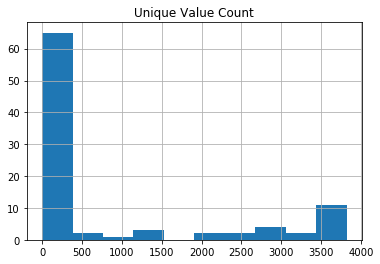

In [126]:
pd.DataFrame((df.T.apply(lambda x: x.nunique(), axis=1)), columns=['Unique Value Count']).hist()

### 2.3 Null Values

In [127]:
# view columns with the most null values by count
pd.DataFrame(np.sum(df.isnull()), columns=['null_count']).sort_values(by='null_count', ascending=False)

,null_count
license,3818
square_feet,3721
monthly_price,2301
security_deposit,1952
weekly_price,1809
notes,1606
neighborhood_overview,1032
cleaning_fee,1030
transit,934
host_about,859


In [128]:
# view columns with the most null values by %

pd.DataFrame(((np.sum(df.isnull()) / df.shape[0]) * 100), columns=['null%']).sort_values(by='null%', ascending=False)

,null%
license,100.000000
square_feet,97.459403
monthly_price,60.267156
security_deposit,51.126244
weekly_price,47.380828
notes,42.063908
neighborhood_overview,27.029859
cleaning_fee,26.977475
transit,24.463070
host_about,22.498690


In [129]:
# filter null count to only show neighbourhood variables

np.sum(df[[i for i in df.columns.tolist() if 'neighbourhood' in i]].isnull())

host_neighbourhood              300
neighbourhood                   416
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
dtype: int64

### 2.4 Pairplots 

Since our analysis is largely revoling around price and its relation to other variables, we can utilize seaborn's pairplot function.

The first pairplot is price along with host variables. The second pairplot is price along with property details.



/anaconda3/envs/plotlytest/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/anaconda3/envs/plotlytest/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



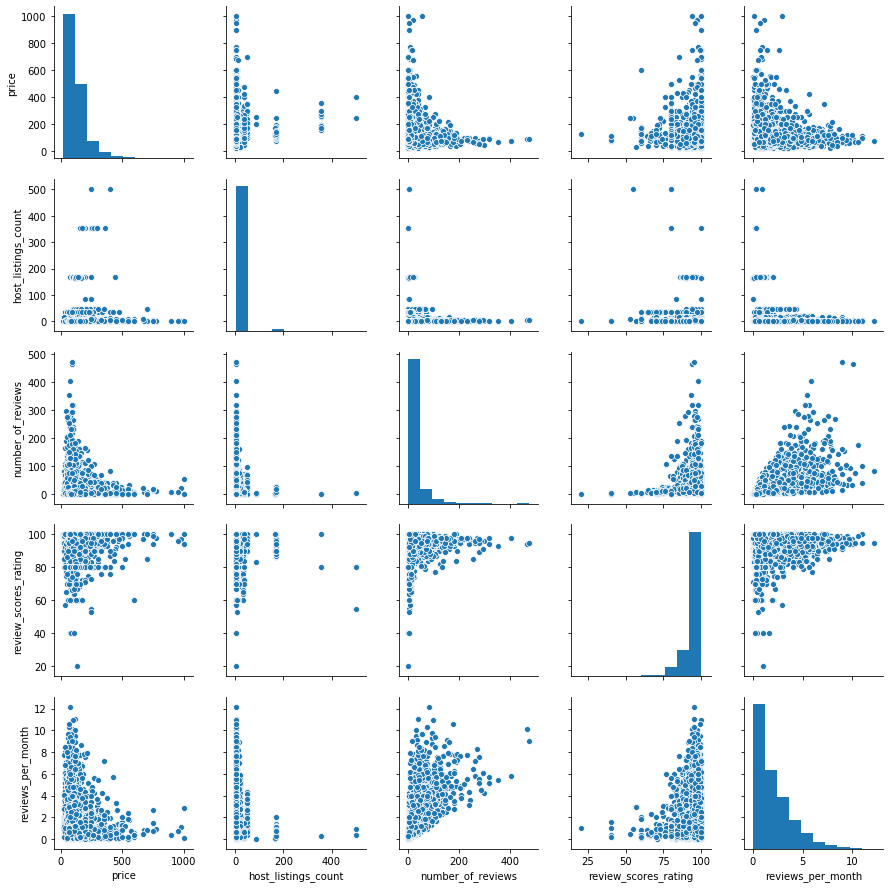

In [139]:
# Pairplot of review variables
review_pairplot_df = df[[  "price", "host_is_superhost","host_listings_count", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

sns.pairplot(review_pairplot_df);

If a reviewer has a lot of reviews per month then the price is tending to be lower. The lowest scored hosts are also on the lower end of listing prices.

/anaconda3/envs/plotlytest/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/anaconda3/envs/plotlytest/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



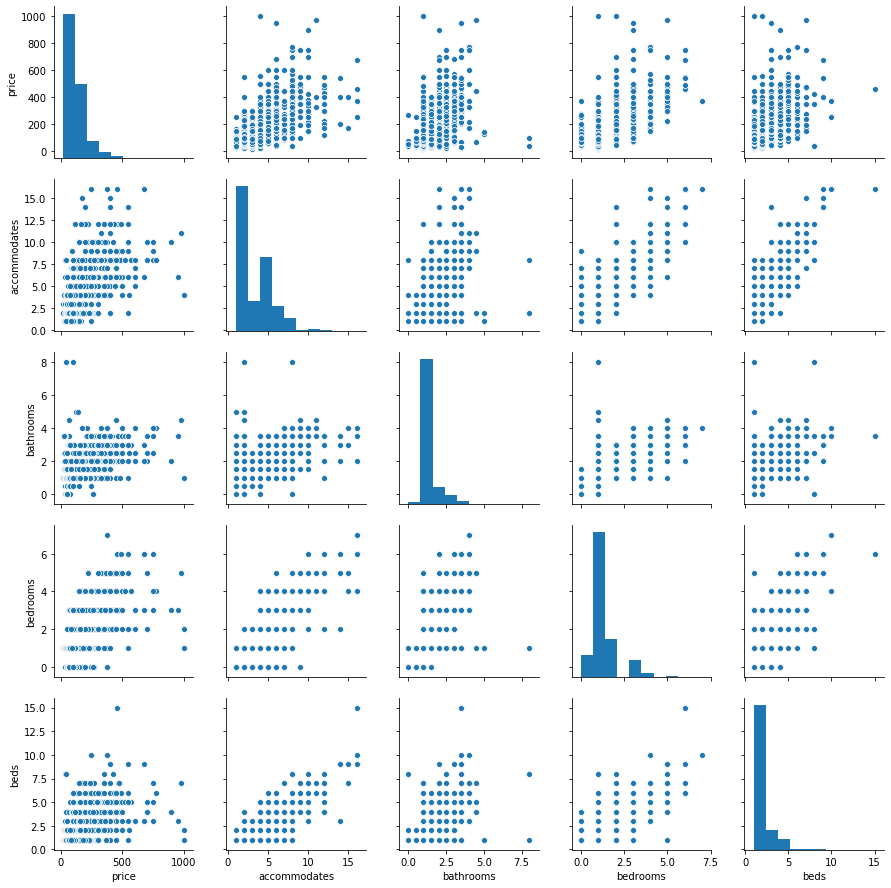

In [145]:
property_pairplot_df =  df[[ "price", "accommodates", "bathrooms", "bedrooms", "beds"]]

sns.pairplot(property_pairplot_df);

There appears to be some collinearity between the 'accomodates' variable and the other property details variables. 

### 2.5 Formatting Price column

The 'price' variable is central to all three questions, so let's take a look at it to see if any cleaning is required

In [130]:
df[['price']].head()

,price
0,$85.00
1,$150.00
2,$975.00
3,$100.00
4,$450.00


The price column has unwanted characters that would cause data processing issues later on, so these characters will be removed and datatype will be converted to float

In [131]:
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")


print(df.price.describe())

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64


Now that the price column has been formatted properly, the first two questions can be addressed.

# What are the distribution of listing prices by neighborhoods?

In [132]:
neighbourhood_list = df['neighbourhood_cleansed'].unique().tolist()
hist_data = []

for neighbourhood in neighbourhood_list:
    trace = go.Histogram(x = df.loc[df['neighbourhood_cleansed'] == neighbourhood].price.tolist(), opacity=0.75, name = neighbourhood)
    hist_data.append(trace)

layout = go.Layout(barmode='stack', xaxis = dict(title='Listing Price'), yaxis = dict(title='Count'))
fig = go.Figure(data=hist_data, layout=layout)

# refer to README.md for dependencies on displaying Plotly Figure in jupyter notebook https://plot.ly/python/static-image-export/
fig.show()


This histogram shows us that there is a long tail for listing prices but that a majority are under $200 with a mean of ~$127. The visualization doesn't help aid in our intution of how listings are distributed by neighborhood however.

I grouped the data by the 'neighbourhood_cleansed' variable and decided to focus my analysis on the top 10 most expensive neighborhoods measured by average (mean) price. I also calculated the standard deviation to get an indication of how spread out the price listings are for their respective locale.



In [133]:
neighborhood_mean_df = pd.DataFrame(df.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
neighborhood_mean_df = neighborhood_mean_df.rename(columns = {'price': 'mean_price'})

neighborhood_std_df = pd.DataFrame(df.groupby('neighbourhood_cleansed').std()['price'].sort_values(ascending=False))
neighborhood_std_df = neighborhood_std_df.rename(columns = {'price': 'std_price'})

neighborhood_df = neighborhood_mean_df.merge(neighborhood_std_df, on='neighbourhood_cleansed')

top_10 = neighborhood_df.index[:10].tolist() # the subset of neighborhoods we'll analyze for question two

neighborhood_df.head(10)

,mean_price,std_price
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,225.117682
Portage Bay,227.857143,197.523458
Westlake,194.470588,173.057475
West Queen Anne,187.769231,170.476425
Montlake,182.789474,171.700508
Briarcliff,176.571429,96.767536
Sunset Hill,176.055556,149.680630
Industrial District,173.333333,104.769588
Alki,171.619048,97.471685


The Southeast Magnolia and Portage Bay are the most expensive neighborhoods with the average listing exceeding $200.

The standard deviations are also high for these neighborhoods. Numeric text isn’t good enough to really build an intuition, so I visualized the distribution of the data with a box plot for each neighborhood.

In [134]:
box_data = []

for neighbourhood in top_10:
    trace = go.Box(x = df.loc[df['neighbourhood_cleansed'] == neighbourhood].price.tolist(), name = neighbourhood)
    box_data.append(trace)

layout = go.Layout(xaxis = dict(title='Listing Price'))
fig = go.Figure(data=box_data, layout=layout)

fig.show()


This visualization helps to show outliers in the data and differences in neighborhoods in terms of median listing price. Could other variables such as property type factor  in to a listing’s price? We’ll look at that next.

# How does the property type impact listing price on a neighborhood basis?

In [135]:
# view prevalance of different property types in the most expensive neighborhoods
stacked_bar_df = pd.DataFrame(df.loc[df['neighbourhood_cleansed'].isin(top_10) ].groupby(['neighbourhood_cleansed', 'property_type']).count()['id']).reset_index()
property_type_list = stacked_bar_df.property_type.unique().tolist()

stacked_bar_data = []

for property_type in property_type_list:
        stacked_bar_trace = go.Bar(name = property_type, x= top_10, y =stacked_bar_df[stacked_bar_df['property_type']== property_type]['id'].tolist())
        stacked_bar_data.append(stacked_bar_trace)
        
layout = go.Layout(title = 'Property Type Count in Top 10 Most Expensive Neighborhoods',
                   barmode = 'stack',
                  yaxis = dict(title='Count'))    
    
stacked_bar_fig = go.Figure(data=stacked_bar_data, layout=layout)

stacked_bar_fig.show()

Judging by the stacked bar chart above, the ‘House’ and ‘Apartment’ property types are the majority of listings and most representative of whats available on the market.

My initial intuition was that Houses would be more expensive than Apartments on average. This turned out to be the case as the heatmap below illustrates.

In [136]:
# create a heat map showing the mean prices for the two most common property types
property_types = ['House', 'Apartment'] 

# transform data to group it properly to for the heatmap visualization using plotly
heatmap_filtered_df = pd.DataFrame(df.loc[df['neighbourhood_cleansed'].isin(top_10) & df['property_type'].isin(property_types)].groupby(['neighbourhood_cleansed', 'property_type']).mean()['price']).reset_index()

heatmap_group = heatmap_filtered_df.groupby('neighbourhood_cleansed')
heatmap_df = pd.DataFrame(heatmap_group.apply(lambda x: x['price'].unique())) # creates a row for each neighborhood with an array of mean prices by property type

heatmap_df.columns = ['price']

heatmap_price= heatmap_df.price.tolist()

heatmap_index = heatmap_df.index.tolist()

heatmap_trace = go.Heatmap(
    z = heatmap_price,
    x = ['Apartment', 'House'],
    y = heatmap_index
)
heatmap_data = [heatmap_trace]


layout = dict(title = 'Comparing Mean Listing Price for Neighborhood by Property Type',
              xaxis= dict(automargin = True),
              yaxis = dict(automargin = True)           
             )
heatmap_fig = go.Figure(data=heatmap_trace, layout = layout)


heatmap_fig.show()

The disparity is most striking in the most expensive neighborhoods, Southeast Magnolia and Portage Bay. This was to be expected though given the relatively larger standard deviation compared to the other neighborhoods.

## 3. Data Preparation

Different data preparation has already been done to primarily address the first two questions through data visualization. 

The following is remaining data preparation to format our data for modeling. 

Missing values will need to be addressed for numeric variables and dummy columns need to be created to have categorical variables in a useable format for modeling later.

Mean imputation was used to not distort the observed mean. Incorporating outliers isn't necessarily an issue so imputing the mean was chosen over imputing the median.

In [137]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Select the numeric variables in the dataset
    2. Imputes the mean to fill null values for numeric variables
    3. Select the categorical variables
    4. Creates dummy columns for the categorical variables
    5. Create X as all the columns that are not the Price column
    6. Create y as the Price column

    '''
  
    num_vars= df.select_dtypes(include=['int','float']).copy().columns

   
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)

   
    cat_vars = df.select_dtypes(include=['object']).copy().columns

   
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
   
    X = df.drop(columns=['price'], axis=1)
    y = df['price']
    
    return X, y

## 4. Modeling

I have chosen a multiple linear regression model for predicting the listing price based upon other independent variables.

The independent variables were chosen based on the criteria of being logically plausible of having a causal impact with the listing price, having relatively few missing values (if any) and a manageable amount of unique values (if a categorical variable).

The clean_data function is used to split the data into the dependent and independent variables.

In [138]:
# select a subset of variables from the dataset

filtered_df = df[[ "host_is_superhost","host_listings_count", "neighbourhood_cleansed", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

X, y = clean_data(filtered_df)

/anaconda3/envs/plotlytest/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### 4.1 train_test_split

sklearn's train_test_split is used split X, y into random train and test subsets

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

### 4.2 Instantiate the Linear Regression Model

The next cell instatiates the linear regression model as lm_model and then fits it using the training data

In [151]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

## 5. Results and Evaluation

### 5.1 R2 Score and RMSE

The r-squared score and root-mean-square error (RMSE) were used to score the model. 

The r-squared score measures for relative goodness-of-fit. 

RMSE is an absolute measure of fit. It's useful since it is measured in the same units as the dependent variable. It is a simple loss function that we seek to minimize (without overfitting).

In [152]:
#Predict and score the model
y_train_preds = lm_model.predict(X_train)
print("The r-squared score for your model on the training data was {} on {} values. The RMSE was {}".format(r2_score(y_train, y_train_preds), len(y_train), mean_squared_error(y_train, y_train_preds)))
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for your model on the test data was {} on {} values.  The RMSE was {}".format(r2_score(y_test, y_test_preds), len(y_test), mean_squared_error(y_test, y_test_preds)))


The r-squared score for your model on the training data was 0.5926903081943571 on 2672 values. The RMSE was 3242.596553930906
The r-squared score for your model on the test data was 0.5975240944346538 on 1146 values.  The RMSE was 3446.6221734160763


The model ended up doing ever so slightly better on the test data than the training data in terms of the r-squared score. This could be due to outliers being more represented in the training data set. 

Other options for future analysis to avoid overfitting or underfitting could be explored such as [cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/).

### 5.2 Scatter plot visualizing linear model with Predicted vs Actual values

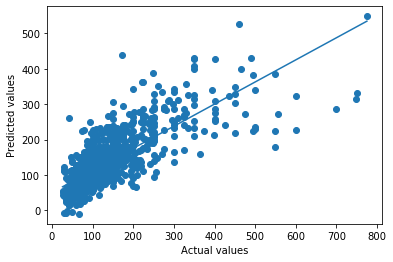

In [143]:
plt.scatter(y_test, y_test_preds)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_preds, 1))(np.unique(y_test)))

### 5.3 Residual Plot of Training data vs Test data

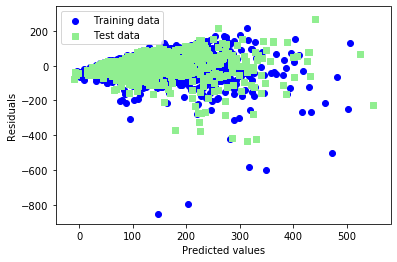

In [142]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

## Conclusion